# Conformal completion of Minkowski spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://relativite.obspm.fr/blackholes/).
  
It makes use of SageMath differential geometry tools developed through the 
[SageManifolds](http://sagemanifolds.obspm.fr) project.

*NB:* a version of SageMath at least equal to 9.4 is required to run this notebook: 

In [1]:
sage.version.banner

'SageMath version 10.7.beta6, Release Date: 2025-06-14'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

## Spherical coordinates on Minkowski spacetime

We declare the spacetime manifold $M$:

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


and the spherical coordinates $(t,r,\theta,\phi)$ as a chart on $M$:

In [4]:
XS.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
XS

Chart (M, (t, r, th, ph))

In [5]:
XS.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: (0, 2*pi)

In term of these coordinates, we set up Minkowski metric as

In [6]:
g = M.metric()
g[0,0] = -1
g[1,1] = 1
g[2,2] = r^2
g[3,3] = r^2*sin(th)^2
g.display()

g = -dt⊗dt + dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

## Null coordinates

Let us introduce the null coordinates $u=t-r$ (retarded time) and $v=t+r$ (advanced time):

In [7]:
XN.<u,v,th,ph> = M.chart(r'u v th:(0,pi):\theta ph:(0,2*pi):\phi',
                         coord_restrictions=lambda u,v,th,ph: v-u>0)
XN

Chart (M, (u, v, th, ph))

In [8]:
XN.coord_range()

u: (-oo, +oo); v: (-oo, +oo); th: (0, pi); ph: (0, 2*pi)

In [9]:
XS_to_XN = XS.transition_map(XN, [t-r, t+r, th, ph])
XS_to_XN.display()

u = -r + t
v = r + t
th = th
ph = ph

In [10]:
XS_to_XN.inverse().display()

t = 1/2*u + 1/2*v
r = -1/2*u + 1/2*v
th = th
ph = ph

In terms of the null coordinates $(u,v,\theta,\phi)$, the Minkowski metric writes

In [11]:
g.display(XN)

g = -1/2 du⊗dv - 1/2 dv⊗du + (1/4*u^2 - 1/2*u*v + 1/4*v^2) dth⊗dth + (1/4*u^2*sin(th)^2 - 1/2*u*v*sin(th)^2 + 1/4*v^2*sin(th)^2) dph⊗dph

For a better display, let us factor the metric components:

In [12]:
g.apply_map(factor, frame=XN.frame(), chart=XN,
            keep_other_components=True)
g.display(XN)

g = -1/2 du⊗dv - 1/2 dv⊗du + 1/4*(u - v)^2 dth⊗dth + 1/4*(u - v)^2*sin(th)^2 dph⊗dph

Let us plot the coordinate grid $(u,v)$ in terms of the coordinates $(t,r)$:

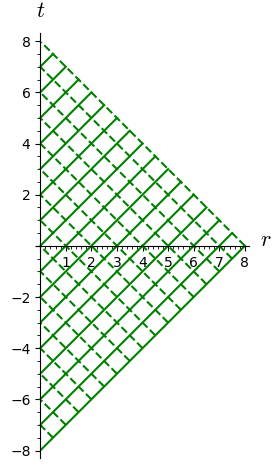

In [13]:
graph = XN.plot(XS, ambient_coords=(r,t), fixed_coords={th: pi/2, ph: pi}, 
                number_values=17, plot_points=200, color='green', 
                style={u: '--', v: '-'}, thickness=1.5)
graph

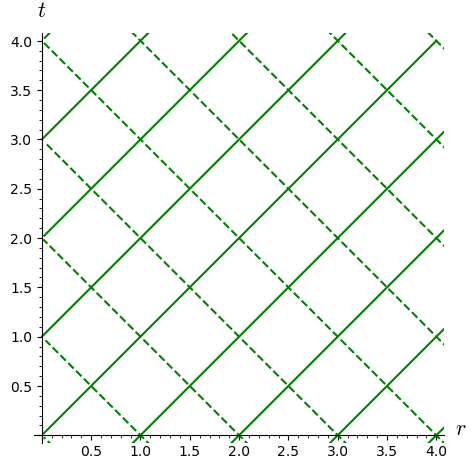

In [14]:
show(graph, xmin=0, xmax=4, ymin=0, ymax=4, aspect_ratio=1)

In [15]:
graph.save("glo_null_coord.pdf", xmin=0, xmax=4, ymin=0, ymax=4, 
           aspect_ratio=1)

## Compactified null coordinates

Instead of $(u,v)$, which span $\mathbb{R}$, let consider the coordinates $U = \mathrm{atan}\,  u$ and $V = \mathrm{atan}\, v$, which span $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$:

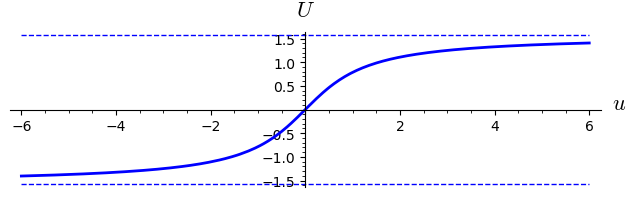

In [16]:
graph = plot(atan(u), (u,-6, 6), thickness=2, axes_labels=[r'$u$', r'$U$']) \
        + line([(-6,-pi/2), (6,-pi/2)], linestyle='--') \
        + line([(-6,pi/2), (6,pi/2)], linestyle='--')
show(graph, aspect_ratio=1)

In [17]:
graph.save('glo_atan.pdf', aspect_ratio=1)

In [18]:
XNC.<U,V,th,ph> = M.chart(r'U:(-pi/2,pi/2) V:(-pi/2,pi/2) th:(0,pi):\theta ph:(0,2*pi):\phi',
                          coord_restrictions=lambda U,V,th,ph: V-U>0)
XNC

Chart (M, (U, V, th, ph))

In [19]:
XNC.coord_range()

U: (-1/2*pi, 1/2*pi); V: (-1/2*pi, 1/2*pi); th: (0, pi); ph: (0, 2*pi)

In [20]:
XN_to_XNC = XN.transition_map(XNC, [atan(u), atan(v), th, ph])
XN_to_XNC.display()

U = arctan(u)
V = arctan(v)
th = th
ph = ph

In [21]:
XN_to_XNC.inverse().display()

u = sin(U)/cos(U)
v = sin(V)/cos(V)
th = th
ph = ph

Expressed in terms of the coordinates $(U,V,\theta,\phi)$, the metric tensor is

In [22]:
g.display(XNC)

g = -1/2/(cos(U)^2*cos(V)^2) dU⊗dV - 1/2/(cos(U)^2*cos(V)^2) dV⊗dU + 1/4*(cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)/(cos(U)^2*cos(V)^2) dth⊗dth + 1/4*(cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)*sin(th)^2/(cos(U)^2*cos(V)^2) dph⊗dph

Again, for a better display, we may factor the metric components:

In [23]:
g.apply_map(factor, frame=XNC.frame(), chart=XNC,
            keep_other_components=True)
g.display(XNC)

g = -1/2/(cos(U)^2*cos(V)^2) dU⊗dV - 1/2/(cos(U)^2*cos(V)^2) dV⊗dU + 1/4*(cos(V)*sin(U) - cos(U)*sin(V))^2/(cos(U)^2*cos(V)^2) dth⊗dth + 1/4*(cos(V)*sin(U) - cos(U)*sin(V))^2*sin(th)^2/(cos(U)^2*cos(V)^2) dph⊗dph

Let us call $\Omega^{-2}$ the common factor: 

In [24]:
Omega = M.scalar_field({XNC: 2*cos(U)*cos(V)}, name='Omega', 
                       latex_name=r'\Omega')
Omega.display()

Omega: M → ℝ
   (u, v, th, ph) ↦ 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (U, V, th, ph) ↦ 2*cos(U)*cos(V)

In [25]:
Omega.display(XS)

Omega: M → ℝ
   (t, r, th, ph) ↦ 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))

## Conformal metric

We introduce the metric $\tilde g = \Omega^2 g$:

In [26]:
gt = M.lorentzian_metric('gt', latex_name=r'\tilde{g}')
gt.set(Omega^2*g)
gt.display(XNC)

gt = -2 dU⊗dV - 2 dV⊗dU + (cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2) dth⊗dth + (cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)*sin(th)^2 dph⊗dph

Clearly the metric components ${\tilde g}_{\theta\theta}$ and ${\tilde g}_{\phi\phi}$ can be simplified further. Let us do it by hand, by extracting the symbolic expression via `expr()`:

In [27]:
g22 = gt[XNC.frame(), 2, 2, XNC].expr()
g22

cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2

In [28]:
g22_simpl = g22.factor().reduce_trig()
g22_simpl

sin(-U + V)^2

In [29]:
g33st = gt[XNC.frame(), 3, 3, XNC].expr() / sin(th)^2
g33st

cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2

In [30]:
g33st.expand_trig()

cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2

In [31]:
g33_simpl = g33st.factor().reduce_trig() * sin(th)^2
g33_simpl

sin(-U + V)^2*sin(th)^2

In [32]:
gt.add_comp(XNC.frame())[2,2, XNC] = g22_simpl
gt.add_comp(XNC.frame())[3,3, XNC] = g33_simpl

Hence the final form of the conformal metric in terms of the compactified null coordinates:

In [33]:
gt.display(XNC)

gt = -2 dU⊗dV - 2 dV⊗dU + sin(-U + V)^2 dth⊗dth + sin(-U + V)^2*sin(th)^2 dph⊗dph

In terms of the non-compactified null coordinates $(u,v,\theta,\phi)$:

In [34]:
gt.display(XN)

gt = -2/((u^2 + 1)*v^2 + u^2 + 1) du⊗dv - 2/((u^2 + 1)*v^2 + u^2 + 1) dv⊗du + (u^2 - 2*u*v + v^2)/((u^2 + 1)*v^2 + u^2 + 1) dth⊗dth + (u^2*sin(th)^2 - 2*u*v*sin(th)^2 + v^2*sin(th)^2)/((u^2 + 1)*v^2 + u^2 + 1) dph⊗dph

In [35]:
gt.apply_map(factor, frame=XN.frame(), chart=XN,
            keep_other_components=True)
gt.display(XN)

gt = -2/((u^2 + 1)*(v^2 + 1)) du⊗dv - 2/((u^2 + 1)*(v^2 + 1)) dv⊗du + (u - v)^2/((u^2 + 1)*(v^2 + 1)) dth⊗dth + (u - v)^2*sin(th)^2/((u^2 + 1)*(v^2 + 1)) dph⊗dph

and in terms of the default coordinates $(t,r,\theta,\phi)$:

In [36]:
gt.display()

gt = -4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dt⊗dt + 4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dr⊗dr + 4*r^2/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dth⊗dth + 4*r^2*sin(th)^2/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dph⊗dph

In [37]:
gt.apply_map(factor, keep_other_components=True)
gt.display()

gt = -4/((r^2 + 2*r*t + t^2 + 1)*(r^2 - 2*r*t + t^2 + 1)) dt⊗dt + 4/((r^2 + 2*r*t + t^2 + 1)*(r^2 - 2*r*t + t^2 + 1)) dr⊗dr + 4*r^2/((r^2 + 2*r*t + t^2 + 1)*(r^2 - 2*r*t + t^2 + 1)) dth⊗dth + 4*r^2*sin(th)^2/((r^2 + 2*r*t + t^2 + 1)*(r^2 - 2*r*t + t^2 + 1)) dph⊗dph

## Einstein cylinder coordinates

Let us introduce coordinates $(\tau,\chi)$ such that the null coordinates $(U,V)$ are
respectively half the retarded time $\tau -\chi$ and half the advanced time $\tau+\chi$:

In [38]:
XC.<tau,ch,th,ph> = M.chart(r'tau:(-pi,pi):\tau ch:(0,pi):\chi th:(0,pi):\theta ph:(0,2*pi):\phi',
                            coord_restrictions=lambda tau,ch,th,ph: [tau<pi-ch, tau>ch-pi])
XC

Chart (M, (tau, ch, th, ph))

In [39]:
XC.coord_range()

tau: (-pi, pi); ch: (0, pi); th: (0, pi); ph: (0, 2*pi)

In [40]:
XC_to_XNC = XC.transition_map(XNC, [(tau-ch)/2, (tau+ch)/2, th, ph])
XC_to_XNC.display()

U = -1/2*ch + 1/2*tau
V = 1/2*ch + 1/2*tau
th = th
ph = ph

In [41]:
XC_to_XNC.inverse().display()

tau = U + V
ch = -U + V
th = th
ph = ph

The conformal metric takes then the form of the standard metric on the Einstein cylinder
$\mathbb{R}\times\mathbb{S}^3$:

In [42]:
gt.display(XC)

gt = -dtau⊗dtau + dch⊗dch + sin(ch)^2 dth⊗dth + sin(ch)^2*sin(th)^2 dph⊗dph

The square of the conformal factor expressed in all the coordinates introduced so far:

In [43]:
(Omega^2).display()

Omega^2: M → ℝ
   (t, r, th, ph) ↦ 4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1)
   (u, v, th, ph) ↦ 4/((u^2 + 1)*v^2 + u^2 + 1)
   (U, V, th, ph) ↦ 4*cos(U)^2*cos(V)^2
   (tau, ch, th, ph) ↦ 4*cos(1/2*ch)^4*cos(1/2*tau)^4 - 8*cos(1/2*ch)^2*cos(1/2*tau)^2*sin(1/2*ch)^2*sin(1/2*tau)^2 + 4*sin(1/2*ch)^4*sin(1/2*tau)^4

The transition map $(t,r,\theta,\phi) \mapsto (\tau,\chi,\theta,\phi)$ is obtained by combining the various transition maps obtained so far:

In [44]:
XS_to_XC = M.coord_change(XNC, XC) * M.coord_change(XN, XNC) * M.coord_change(XS, XN)
XS_to_XC.display()

tau = arctan(r + t) + arctan(-r + t)
ch = arctan(r + t) - arctan(-r + t)
th = th
ph = ph

The inverse transitin map:

In [45]:
XC_to_XS = M.coord_change(XN, XS) * M.coord_change(XNC, XN) * M.coord_change(XC, XNC)
XC_to_XS.display()

t = cos(1/2*tau)*sin(1/2*tau)/(cos(1/2*ch)^2*cos(1/2*tau)^2 - sin(1/2*ch)^2*sin(1/2*tau)^2)
r = cos(1/2*ch)*sin(1/2*ch)/(cos(1/2*ch)^2*cos(1/2*tau)^2 - sin(1/2*ch)^2*sin(1/2*tau)^2)
th = th
ph = ph

The expressions for $t$ and $r$ can be simplified via `reduce_trig`:

In [46]:
t_c = XC_to_XS(tau,ch,th,ph)[0]
r_c = XC_to_XS(tau,ch,th,ph)[1]

XS_to_XC.set_inverse(t_c.reduce_trig(), r_c.reduce_trig(), th, ph)

Check of the inverse coordinate transformation:
  t == t  *passed*
  r == r  *passed*
  th == th  *passed*
  ph == ph  *passed*
  tau == arctan((sin(ch) + sin(tau))/(cos(ch) + cos(tau))) + arctan(-(sin(ch) - sin(tau))/(cos(ch) + cos(tau)))  **failed**
  ch == arctan((sin(ch) + sin(tau))/(cos(ch) + cos(tau))) - arctan(-(sin(ch) - sin(tau))/(cos(ch) + cos(tau)))  **failed**
  th == th  *passed*
  ph == ph  *passed*
NB: a failed report can reflect a mere lack of simplification.


In [47]:
XC_to_XS = XS_to_XC.inverse()
XC_to_XS.display()

t = sin(tau)/(cos(ch) + cos(tau))
r = sin(ch)/(cos(ch) + cos(tau))
th = th
ph = ph

### Expression of the stationary Killing vector in terms of various coordinate charts

The stationary Killing vector of Minkowski spacetime is

In [48]:
xi = M.vector_field(1,0,0,0, frame=XS.frame(), chart=XS,
                    name='xi', latex_name=r'\xi')
xi.display(XS)

xi = ∂/∂t

In [49]:
xi.display(XN)

xi = ∂/∂u + ∂/∂v

In [50]:
xi.display(XNC)

xi = cos(U)^2 ∂/∂U + cos(V)^2 ∂/∂V

In [51]:
xi.display(XC)

xi = (cos(ch)*cos(tau) + 1) ∂/∂tau - sin(ch)*sin(tau) ∂/∂ch

## Conformal Penrose diagram

Let us draw the coordinate grid $(t,r)$ in terms of the coordinates $(\tau,\chi)$:

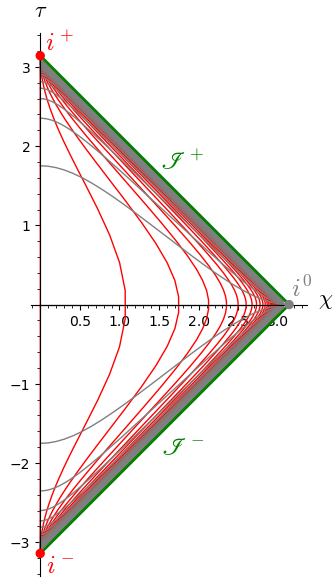

In [52]:
graphXS = XS.plot(XC, ambient_coords=(ch, tau), fixed_coords={th: pi/2, ph: pi}, 
                  max_range=30, number_values=51, plot_points=250, 
                  color={t: 'red', r: 'grey'})
graph_i0 = circle((pi,0), 0.05, fill=True, color='grey') + \
           text(r"$i^0$", (3.3, 0.2), fontsize=18, color='grey') 
graph_ip = circle((0,pi), 0.05, fill=True, color='red') + \
           text(r"$i^+$", (0.25, 3.3), fontsize=18, color='red')
graph_im = circle((0,-pi), 0.05, fill=True, color='red') + \
           text(r"$i^-$", (0.25, -3.3), fontsize=18, color='red')
graph_Ip = line([(0,pi), (pi,0)], color='green', thickness=2) + \
           text(r"$\mathscr{I}^+$", (1.8, 1.8), fontsize=18, color='green')
graph_Im = line([(0,-pi), (pi,0)], color='green', thickness=2) + \
           text(r"$\mathscr{I}^-$", (1.8, -1.8), fontsize=18, color='green')
graph = graphXS + graph_i0 + graph_ip + graph_im + graph_Ip + graph_Im
show(graph, figsize=8)

In [53]:
graph.save('glo_conf_diag_Mink.pdf', figsize=8)

Some blow-up near $i^0$:

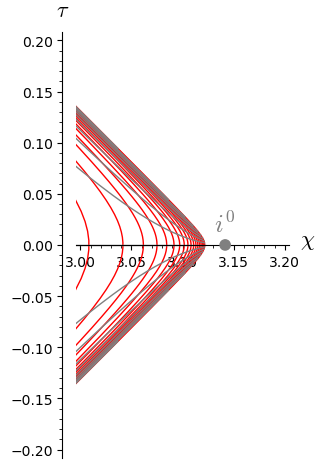

In [54]:
graph = XS.plot(XC, ambient_coords=(ch, tau), fixed_coords={th: pi/2, ph: pi}, 
                max_range=100, number_values=21, plot_points=200, 
                color={t: 'red', r: 'grey'})
graph += circle((pi,0), 0.005, fill=True, color='grey') + \
         text(r"$i^0$", (pi, 0.02), fontsize=18, color='grey') 
show(graph, xmin=3., xmax=3.2, ymin=-0.2, ymax=0.2, aspect_ratio=1)

To produce a more satisfactory figure, let us use some logarithmic radial coordinate:

In [55]:
XL.<t, rh, th, ph> = M.chart(r't rh:\rho th:(0,pi):\theta ph:(0,2*pi):\phi')
XL

Chart (M, (t, rh, th, ph))

In [56]:
XS_to_XL = XS.transition_map(XL, [t, ln(r), th, ph])
XS_to_XL.display()

t = t
rh = log(r)
th = th
ph = ph

In [57]:
XS_to_XL.inverse().display()

t = t
r = e^rh
th = th
ph = ph

In [58]:
XL_to_XC = M.coord_change(XS, XC) * M.coord_change(XL, XS)
XC_to_XL = M.coord_change(XS, XL) * M.coord_change(XC, XS)

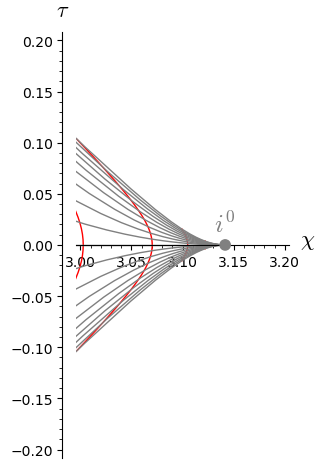

In [59]:
graph = XL.plot(XC, ambient_coords=(ch, tau), fixed_coords={th: pi/2, ph: pi}, 
                ranges={t: (-20, 20), rh: (-2, 10)}, number_values=19, 
                color={t: 'red', rh: 'grey'})
graph += circle((pi,0), 0.005, fill=True, color='grey') + \
         text(r"$i^0$", (pi, 0.02), fontsize=18, color='grey') 
show(graph, xmin=3., xmax=3.2, ymin=-0.2, ymax=0.2, aspect_ratio=1)

Plot of the stationary Killing vector $\xi$:

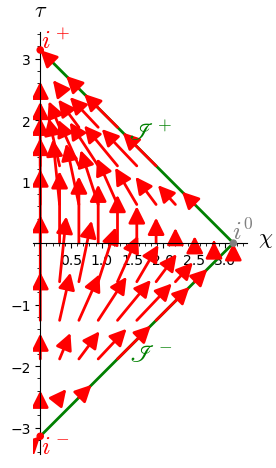

In [60]:
graph_xi = xi.plot(chart=XC, ambient_coords=(ch,tau), 
                   chart_domain=XC, fixed_coords={th: pi/2, ph: pi},
                   number_values=11, color='red', scale=0.6, aspect_ratio=1)
graph = graph_i0 + graph_ip + graph_im + graph_Ip + graph_Im + graph_xi
#show(graph, figsize=8)
graph.save('sta_conf_diag_Mink_xi.pdf')
graph

### Null radial geodesics in the conformal diagram

To get a view of the null radial geodesics in the conformal diagram, it suffices to plot the chart $(u,v,\theta,\phi)$ in terms of the chart $(\tau,\chi,\theta,\phi)$. 
The following plot shows 
- the null geodesics defined by $(u,\theta,\phi) = (u_0, \pi/2,\pi)$ for 17 values of $u_0$ evenly spaced in $[-8,8]$ (dashed lines) 
- the null geodesics defined by $(v,\theta,\phi) = (v_0, \pi/2,\pi)$ for 17 values of $v_0$ evenly spaced in $[-8,8]$ (solid lines)

In [61]:
graphXN = XN.plot(XC, ambient_coords=(ch, tau), fixed_coords={th: pi/2, ph: pi}, 
                  number_values=17, plot_points=150, color='green', 
                  style={u: '--', v: '-'}, thickness=1.5)
graph = graphXN + graph_i0 + graph_ip + graph_im + graph_Ip + graph_Im
show(graph, figsize=8)

In [62]:
graph.save('glo_conf_Mink_null.pdf', figsize=8)

## Conformal factor

The conformal factor expressed in various coordinate systems:

In [63]:
Omega.display()

Omega: M → ℝ
   (t, r, th, ph) ↦ 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))
   (u, v, th, ph) ↦ 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (U, V, th, ph) ↦ 2*cos(U)*cos(V)
   (tau, ch, th, ph) ↦ 2*cos(1/2*ch)^2*cos(1/2*tau)^2 - 2*sin(1/2*ch)^2*sin(1/2*tau)^2
   (t, rh, th, ph) ↦ 2/(sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1))

The expression in terms of $(\tau,\chi,\theta,\phi)$ can be simplified:

In [64]:
Omega_XC = Omega.expr(XC)
Omega_XC

2*cos(1/2*ch)^2*cos(1/2*tau)^2 - 2*sin(1/2*ch)^2*sin(1/2*tau)^2

In [65]:
Omega_XC.trig_reduce() 

cos(ch) + cos(tau)

Hence we set

In [66]:
Omega.add_expr(Omega_XC.trig_reduce(), XC)
Omega.display()

Omega: M → ℝ
   (t, r, th, ph) ↦ 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))
   (u, v, th, ph) ↦ 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (U, V, th, ph) ↦ 2*cos(U)*cos(V)
   (tau, ch, th, ph) ↦ cos(ch) + cos(tau)
   (t, rh, th, ph) ↦ 2/(sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1))

A plot of $\Omega$ in terms of the coordinates $(\tau,\chi)$:

In [67]:
graph = plot3d(Omega.expr(XC), (tau,-pi,pi), (ch,0,pi)) \
        + plot3d(0, (tau,-pi,pi), (ch,0,pi), color='yellow', opacity=0.7)
show(graph, aspect_ratio=1, axes_labels=['tau', 'chi', 'Omega'])

Graphics3d Object

In [68]:
show(graph, aspect_ratio=1, viewer='tachyon')

### Differential of the conformal factor

The 1-form $\mathrm{d}\Omega$ is:

In [69]:
dOmega = Omega.differential()
print(dOmega)

1-form dOmega on the 4-dimensional Lorentzian manifold M


In [70]:
dOmega.display()

dOmega = -4*(t^3 - (r^2 - 1)*t)*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)/(r^8 + t^8 - 4*(r^2 - 1)*t^6 + 4*r^6 + 2*(3*r^4 - 2*r^2 + 3)*t^4 + 6*r^4 - 4*(r^6 + r^4 - r^2 - 1)*t^2 + 4*r^2 + 1) dt - 4*(r^3 - r*t^2 + r)*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)/(r^8 + t^8 - 4*(r^2 - 1)*t^6 + 4*r^6 + 2*(3*r^4 - 2*r^2 + 3)*t^4 + 6*r^4 - 4*(r^6 + r^4 - r^2 - 1)*t^2 + 4*r^2 + 1) dr

In [71]:
dOmega.display(XNC)

dOmega = -2*cos(V)*sin(U) dU - 2*cos(U)*sin(V) dV

In [72]:
M.set_default_chart(XNC)
M.set_default_frame(XNC.frame())

In [73]:
dOmega.display()

dOmega = -2*cos(V)*sin(U) dU - 2*cos(U)*sin(V) dV

In [74]:
dOmega1 = M.one_form()
dOmega1[0] = -2*cos(V)*sin(U)
dOmega1[1] = -2*cos(U)*sin(V)
dOmega1.display()

-2*cos(V)*sin(U) dU - 2*cos(U)*sin(V) dV

In [75]:
dOmega1.display(XC.frame(), XC)

-2*cos(1/2*tau)*sin(1/2*tau) dtau - 2*cos(1/2*ch)*sin(1/2*ch) dch

## Einstein static universe

In [76]:
E = Manifold(4, 'E')
print(E)

4-dimensional differentiable manifold E


In [77]:
XE.<tau,ch,th,ph> = E.chart(r'tau:\tau ch:(0,pi):\chi th:(0,pi):\theta ph:(0,2*pi):\phi')
XE

Chart (E, (tau, ch, th, ph))

In [78]:
XE.coord_range()

tau: (-oo, +oo); ch: (0, pi); th: (0, pi); ph: (0, 2*pi)

In [79]:
XC.coord_range()

tau: (-pi, pi); ch: (0, pi); th: (0, pi); ph: (0, 2*pi)

## Embedding of $M$ in $E$

In [80]:
Phi = M.diff_map(E, {(XC, XE): [tau, ch, th, ph]},
                 name='Phi', latex_name=r'\Phi')
print(Phi)
Phi.display()

Differentiable map Phi from the 4-dimensional Lorentzian manifold M to the 4-dimensional differentiable manifold E


Phi: M → E
   (t, r, th, ph) ↦ (tau, ch, th, ph) = (arctan(r + t) + arctan(-r + t), arctan(r + t) - arctan(-r + t), th, ph)
   (u, v, th, ph) ↦ (tau, ch, th, ph) = (arctan(u) + arctan(v), -arctan(u) + arctan(v), th, ph)
   (U, V, th, ph) ↦ (tau, ch, th, ph) = (U + V, -U + V, th, ph)
   (tau, ch, th, ph) ↦ (tau, ch, th, ph) = (tau, ch, th, ph)
   (t, rh, th, ph) ↦ (tau, ch, th, ph) = (arctan(t + e^rh) + arctan(t - e^rh), arctan(t + e^rh) - arctan(t - e^rh), th, ph)

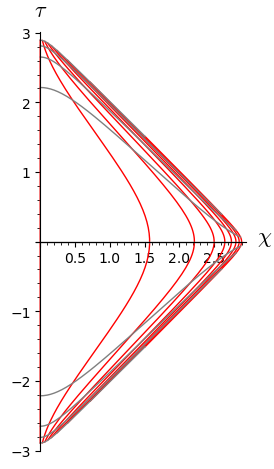

In [81]:
XS.plot(XE, mapping=Phi, ambient_coords=(ch, tau), fixed_coords={th: pi/2, ph: pi}, 
        plot_points=200, color={t: 'red', r: 'grey'})

## Embedding of $E$ in $\mathbb{R}^5$

In [82]:
R5 = Manifold(5, 'R^5', latex_name=r'\mathbb{R}^5')
print(R5)

5-dimensional differentiable manifold R^5


In [83]:
X5.<tau,W,X,Y,Z> = R5.chart(r'tau:\tau W X Y Z')
X5

Chart (R^5, (tau, W, X, Y, Z))

In [84]:
Psi = E.diff_map(R5, {(XE, X5): [tau,
                                 cos(ch),
                                 sin(ch)*sin(th)*cos(ph), 
                                 sin(ch)*sin(th)*sin(ph), 
                                 sin(ch)*cos(th)]},
                 name='Psi', latex_name=r'\Psi')
print(Psi)
Psi.display()

Differentiable map Psi from the 4-dimensional differentiable manifold E to the 5-dimensional differentiable manifold R^5


Psi: E → R^5
   (tau, ch, th, ph) ↦ (tau, W, X, Y, Z) = (tau, cos(ch), cos(ph)*sin(ch)*sin(th), sin(ch)*sin(ph)*sin(th), cos(th)*sin(ch))

The Einstein cylinder:

In [85]:
graphE = XE.plot(X5, ambient_coords=(W,X,tau), mapping=Psi, 
                 fixed_coords={th:pi/2, ph:0.001}, max_range=4, 
                 number_values=9, color='silver', thickness=0.5,
                 label_axes=False)  # phi = 0 
graphE += XE.plot(X5, ambient_coords=(W,X,tau), mapping=Psi, 
                  fixed_coords={th:pi/2, ph:pi}, max_range=4, 
                  number_values=9, color='silver', thickness=0.5,
                  label_axes=False)  # phi = pi
show(graphE, aspect_ratio=1, axes_labels=['W', 'X', 'tau'])

Graphics3d Object

## Embedding of $M$ in $\mathbb{R}^5$

The embedding $\Theta:\, M\rightarrow \mathbb{R}^5$ is obtained by composition of the embeddings
$\Phi:\, M\rightarrow E$ and $\Psi:\, E\rightarrow \mathbb{R}^5$:

In [86]:
Theta = Psi * Phi
print(Theta)
Theta.display()

Differentiable map from the 4-dimensional Lorentzian manifold M to the 5-dimensional differentiable manifold R^5


M → R^5
   (t, r, th, ph) ↦ (tau, W, X, Y, Z) = (arctan(r + t) + arctan(-r + t), -sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*(r^2 - t^2 - 1)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*cos(ph)*sin(th)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*sin(ph)*sin(th)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*cos(th)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1))
   (u, v, th, ph) ↦ (tau, W, X, Y, Z) = (arctan(u) + arctan(v), sqrt(u^2 + 1)*(u*v + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), -(u*cos(ph)*sin(th) - v*cos(ph)*sin(th))*sqrt(u^2 + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), -(u*sin(ph)*sin(th) - v*sin(ph)*sin(th))*sqrt(u^2 + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), -sqrt(u^2 + 1)*sqrt(v^2 + 1)*(u*cos(th) - v*cos(th))/((u^2 + 1)*v^2 + u^2 + 1))
   (U, V, th, ph) ↦ (tau, W, X, Y, Z) = (U + V, cos(U)*cos(V) + sin(U)*sin(V), -(cos(V)*sin(U) - cos(U)*sin(V))*cos(ph)*sin(th), -(cos(V)*sin(U) - cos(U)*sin(V))*sin(ph)*sin(th), -(cos(V)*sin(U) - cos(U)*sin(V))*cos(th))
   (tau, ch, th, ph) ↦ (tau, W, X, Y, Z) = (tau, cos(ch), cos(ph)*sin(ch)*sin(th), sin(ch)*sin(ph)*sin(th), cos(th)*sin(ch))
   (t, rh, th, ph) ↦ (tau, W, X, Y, Z) = (arctan(t + e^rh) + arctan(t - e^rh), sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*(t^2 - e^(2*rh) + 1)/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1), 2*sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*cos(ph)*e^rh*sin(th)/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1), 2*sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*e^rh*sin(ph)*sin(th)/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1), 2*sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*cos(th)*e^rh/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1))

In [87]:
graphM = XS.plot(X5, ambient_coords=(W,X,tau), mapping=Theta, 
                 fixed_coords={th:pi/2, ph:0.001}, max_range=30, 
                 number_values=51, plot_points=250, color={t:'red', r:'black'}, 
                 label_axes=False)  # phi = 0 
graphM += XS.plot(X5, ambient_coords=(W,X,tau), mapping=Theta, 
                  fixed_coords={th:pi/2, ph:pi}, max_range=30, 
                  number_values=51, plot_points=250, color={t:'red', r:'black'}, 
                  label_axes=False)  # phi = pi
show(graphE + graphM, aspect_ratio=1, axes_labels=['W', 'X', 'tau'])

Graphics3d Object

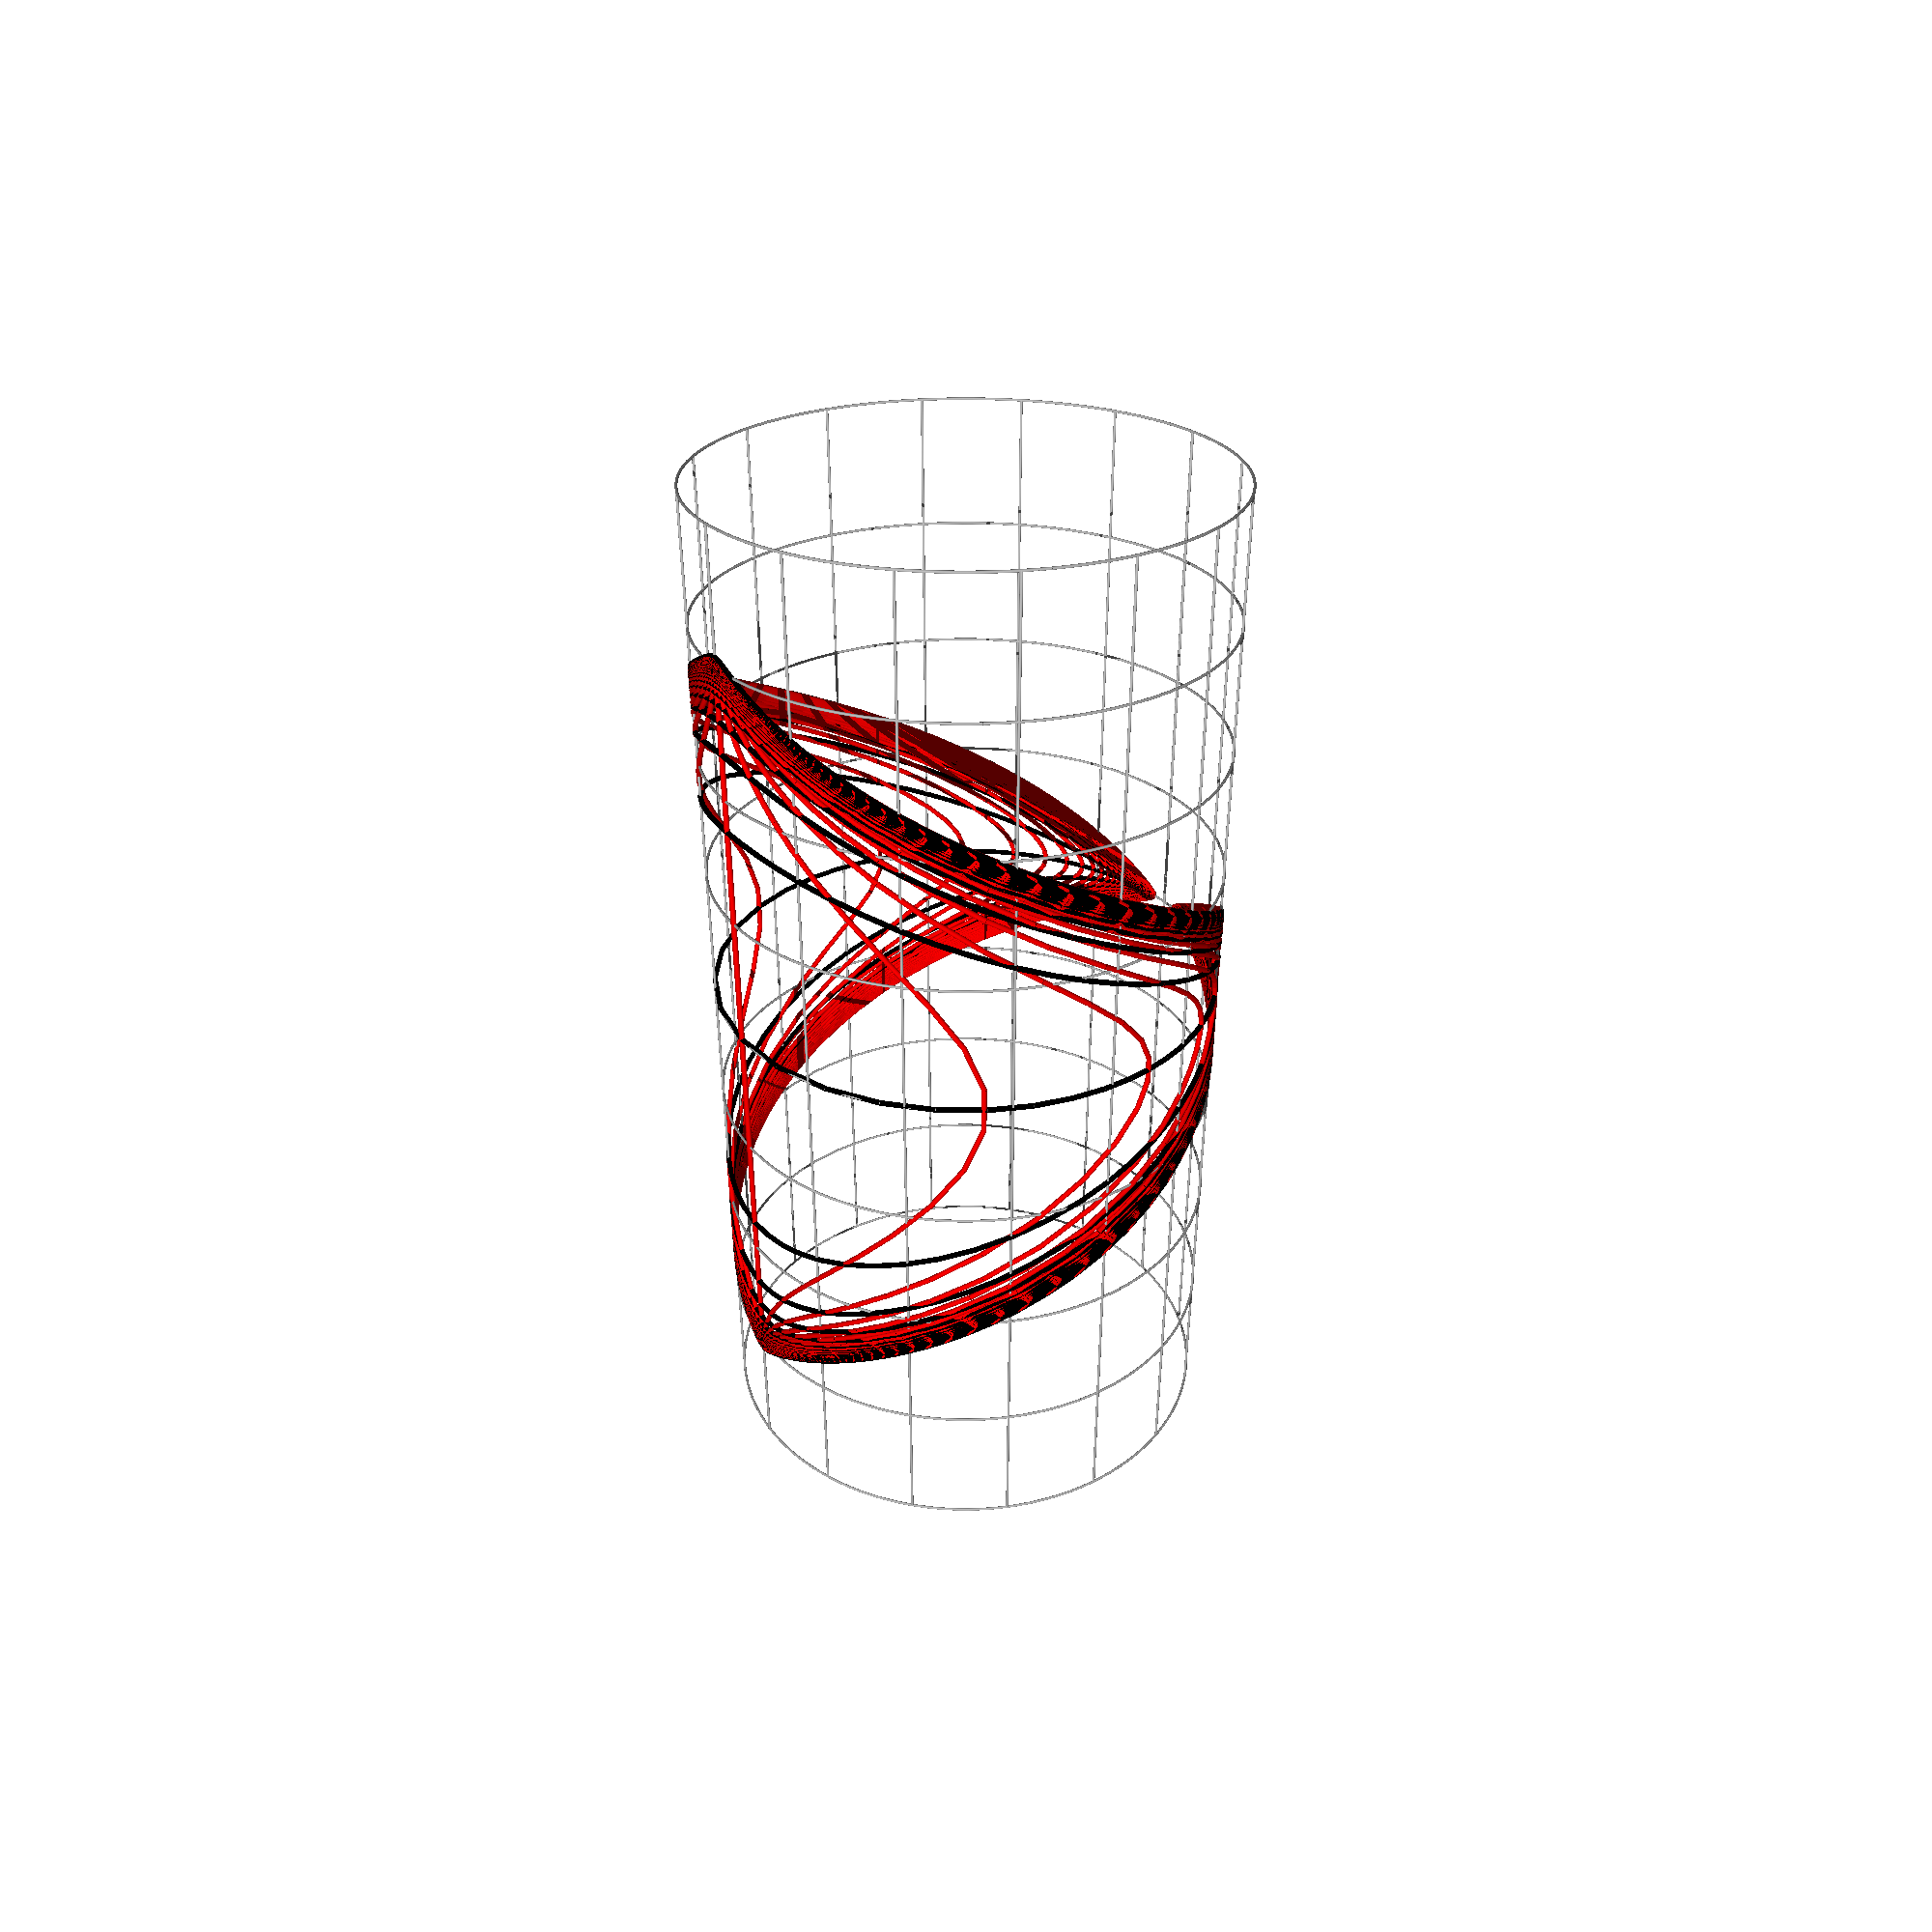

In [88]:
graph = (graphE + graphM).rotate((0,0,1), 0.2)
show(graph, aspect_ratio=(2,2,1), viewer='tachyon', 
     frame=False, figsize=20)

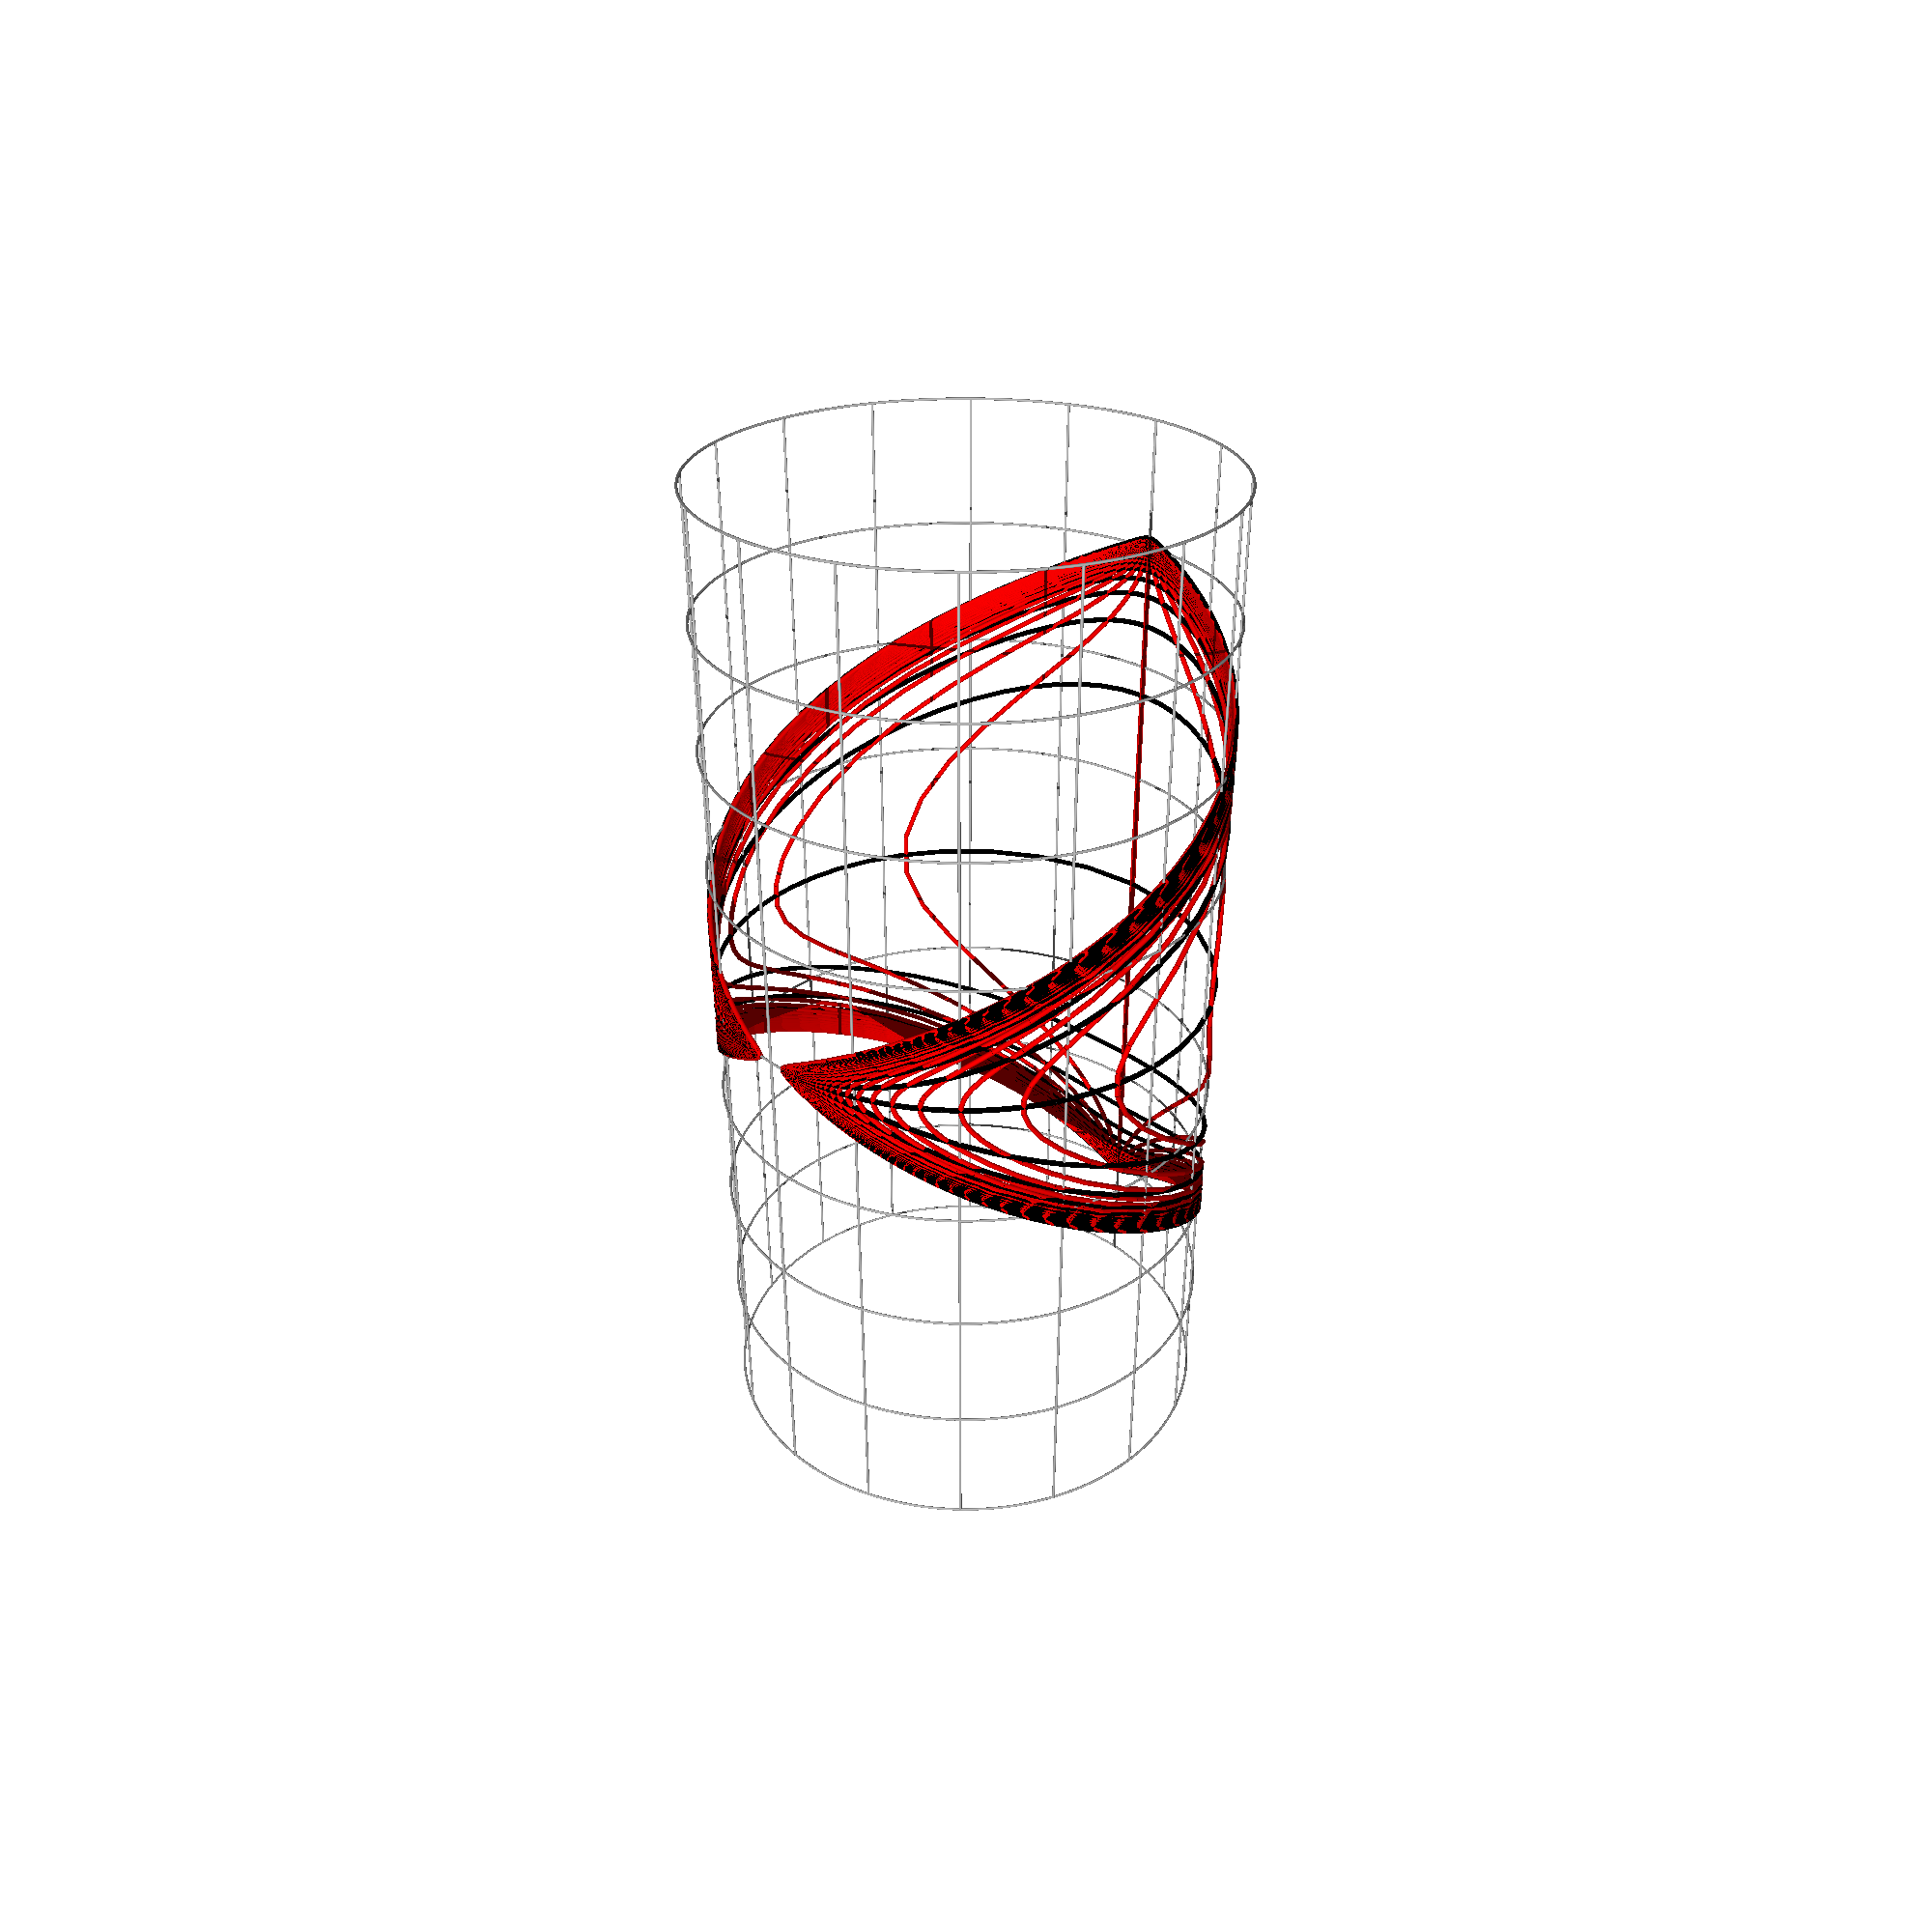

In [89]:
graph = (graphE + graphM).rotate((0,0,1), pi)
show(graph, aspect_ratio=(2,2,1), viewer='tachyon', 
     frame=False, figsize=20)

In [90]:
graphMN = XN.plot(X5, ambient_coords=(W,X,tau), mapping=Theta, 
                  fixed_coords={th:pi/2, ph:0.001}, max_range=16, 
                  number_values=21, plot_points=150, color='green', 
                  style={u: '--', v: '-'}, label_axes=False)  # phi = 0 
graphMN += XN.plot(X5, ambient_coords=(W,X,tau), mapping=Theta, 
                   fixed_coords={th:pi/2, ph:pi}, max_range=16, 
                   number_values=21, plot_points=150, color='green', 
                   style={u: '--', v: '-'}, label_axes=False)  # phi = pi

In [91]:
show(graphE + graphMN, aspect_ratio=1, frame=False)

Graphics3d Object

In [92]:
show(graphE + graphMN, aspect_ratio=(2,2,1), viewer='tachyon', 
     frame=False, figsize=20)